# 'WeRateDogs' - Data wrangling project by Michael Bong

## Introduction

The aim of this project is to wrangle 'WeRateDogs' Twitter data by putting it through a process of gathering, assessing and cleaning. Once this is done sufficiently, the data will then be analysed to derive valuable insights! 

## The data set

We will be working with 3 data sets:
 - Data set 1 (df_archive) - 'twitter_archive_enhanced.csv': Historical tweet data
 - Data set 2 (df_image) - 'image_predictions.tsv': Predicted dog type data
 - Data set 3 (df_tweet) - 'tweet_json.txt': Live tweet data

## Setup

In this section, we will import all the libraries needed

In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import requests

import tweepy
from tweepy import OAuthHandler
import json
import csv
import sys
import time

## Gathering data

### Data set 1 - Twitter archive data

In [2]:
#Data set 1
#import 'twitter_archive_enhanced.csv' file
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Data set 2 - Predicted dog image data

In [3]:
#Data set 2
#import dog image prediction file from URL programatically

# Save to a file
folder_name = 'image_predictions'

#Create folder if folder does not exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [4]:
#check the imported tsv file
df_image = pd.read_csv('image_predictions/image-predictions.tsv', sep = '\t')
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Data set 3 - Live tweet data
As the tweepy query takes along time to run and we have previously run it successfully and generated the required data set (tweet_json.txt), the code for the tweepy query is provided in markdown cells.

In this run, Twitter API data will be read directly from the 'tweet_json.txt' file.

#### Data set 3 - code to import Twitter API data (needed to run for the first time, but takes a long time)

##### provide API keys, secrets and tokens
- consumer_key = 'ELfqsOS369pe9RYamSJDHz6gi'
- consumer_secret = 'vI05Px8lZWzBuSXW1emFTCHLFhmm8rNhlVpEsIiPAP9wwamfFR'
- access_token = '893460460741066753-09ZwWp8miO6x4Sgi1x6TTBXysWyx1kT'
- access_secret = 'HdpMYOE7NzkwdiidNR1XbhwFg5dwYolpYtBPMfRqxfTtP'

##### tweepy query
- auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
- auth.set_access_token(access_token, access_secret)
- api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

##### Twitter Query using tweet_id information from the df
- tweet_ids = list(df_archive.tweet_id)

- tweet_data = {}
- for tweet in tweet_ids:
-     try:
-         tweet_status = api.get_status(tweet,
-                                       wait_on_rate_limit=True, 
-                                       wait_on_rate_limit_notify=True)
-         tweet_data[str(tweet)] = tweet_status._json
-         print("Match found for: " + str(tweet))
-     except: 
-         print("Error for: " + str(tweet))

##### Copy data to tweet_json.txt file
- with open('tweet_json.txt', 'w') as outfile:  
-     json.dump(tweet_data, outfile, 
-               sort_keys = True,
-               indent=4)

In [5]:
# As mentioned earlier, in this run, Twitter API data will be read directly from the 'tweet_json.txt' file.
df_tweet = pd.read_json('tweet_json.txt',orient='index')
df_tweet.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2563,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,514,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,130,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,125,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,44,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,299,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,141,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,109,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."


## Assessing data

The data that has been gathered is now checked visually and programmatically for data quality and data tidiness challenges.
We are aiming to identify >= 8 quality issues and >= 2 tidiness issues.

Within each data set section, we will identify the 'Quality' and 'Tidiness' issues that need to be fixed.

### Data set 1 - Twitter archive data

In [6]:
df_archive.head(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
df_archive.tail(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2341,666094000022159362,NaN,NaN,2015-11-16 03:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This appears to be a Mongolian Presbyterian mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666094000...,9,10,None,None,None,None,None
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None


In [8]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
# df_archive['name'].value_counts()
df_archive[df_archive['name'] == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [11]:
df_archive[df_archive['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [12]:
df_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [13]:
df_archive['timestamp'].max(), df_archive['timestamp'].min()

('2017-08-01 16:23:56 +0000', '2015-11-15 22:32:08 +0000')

### Data set 2 - Predicted dog image data

In [14]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
df_image[df_image['tweet_id'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [18]:
df_image[df_image['jpg_url'].duplicated()].sort_values(by = ['jpg_url'])

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1717,819015331746349057,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,4,prison,0.907083,False,palace,0.020089,False,umbrella,0.007850,False
1746,823269594223824897,https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg,1,Samoyed,0.585441,True,Pomeranian,0.193654,True,Arctic_fox,0.071648,False
1742,822647212903690241,https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg,1,Samoyed,0.416769,True,malamute,0.252706,True,kuvasz,0.157028,True
1789,829878982036299777,https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg,1,golden_retriever,0.617389,True,Labrador_retriever,0.337053,True,tennis_ball,0.008554,False
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True


In [19]:
df_image[df_image['jpg_url'] == 'https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg'].sort_values(by = ['jpg_url'])

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [20]:
df_archive[df_archive['tweet_id'] == 819004803107983360]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None


In [21]:
df_archive[df_archive['tweet_id'] == 819015337530290176]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None


### Data set 3 - Live tweet data

In [22]:
df_tweet.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2563,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,514,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,130,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,125,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,44,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,299,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,141,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,109,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,40,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."


In [23]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2343 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2343 non-null datetime64[ns]
entities                         2343 non-null object
extended_entities                1823 non-null object
favorite_count                   2343 non-null int64
favorited                        2343 non-null int64
geo                              0 non-null float64
id                               2343 non-null int64
id_str                           2343 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  23

In [24]:
df_tweet.describe()

,contributors,coordinates,favorite_count,favorited,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,truncated
count,0.0,0.0,2343.000000,2343.0,0.0,2.343000e+03,2.343000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2343.000000,2206.0,2206.0,2.600000e+01,2.600000e+01,2343.000000,2343.0,2343.00000
mean,NaN,NaN,8040.075117,0.0,NaN,7.422769e+17,7.422769e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.013231,0.0,0.0,8.113972e+17,8.113972e+17,2983.737516,0.0,0.10542
std,NaN,NaN,12207.108531,0.0,NaN,6.836264e+16,6.836264e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.114287,0.0,0.0,6.295843e+16,6.295843e+16,4946.936947,0.0,0.30716
min,NaN,NaN,0.000000,0.0,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.000000,0.0,0.0,6.721083e+17,6.721083e+17,0.000000,0.0,0.00000
25%,NaN,NaN,1395.500000,0.0,NaN,6.783607e+17,6.783607e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.000000,0.0,0.0,7.761338e+17,7.761338e+17,600.000000,0.0,0.00000
50%,NaN,NaN,3515.000000,0.0,NaN,7.186315e+17,7.186315e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.000000,0.0,0.0,8.281173e+17,8.281173e+17,1399.000000,0.0,0.00000
75%,NaN,NaN,9902.500000,0.0,NaN,7.986999e+17,7.986999e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.000000,0.0,0.0,8.637581e+17,8.637581e+17,3483.500000,0.0,0.00000
max,NaN,NaN,142430.000000,0.0,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,1.000000,0.0,0.0,8.860534e+17,8.860534e+17,76751.000000,0.0,1.00000


In [25]:
list(df_tweet)

['contributors',
 'coordinates',
 'created_at',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source',
 'text',
 'truncated',
 'user']

In [26]:
df_tweet[df_tweet['id'].duplicated()]

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user


In [27]:
df_tweet['created_at'].max(), df_tweet['created_at'].min()

(Timestamp('2017-08-01 16:23:56'), Timestamp('2015-11-15 22:32:08'))

### Quality issues
This covers mostly: data that shouldn't be there, but is; data that isn't there, but should be.

#### Data set 1: df_archive
 - (A)x Retweets need to be removed
 - (C)x Remove unrequired columns such as: 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id' 'retweeted_status_user_id', 'retweeted_status_timestamp'
 - (D)x 'source' has a lot of unnecessary characters and can be cleaned to show only relevant information
 - (E)x All identifier columns such as 'tweet_id' and 'id' should be made to a string object, as we do not need to do any calculations on them
 - (L)x Object is data type of 'timestamp', when it should be datetime
 - (M)x Remove tweets without images (expanded_urls)
 - (Z2)x Remove 'doggo', 'pupper', 'puppo', 'floofer' columns after a consolidated 'dog_type' column has been created

#### Data set 2: df_image
 - (H)x All identifier columns such as 'tweet_id' and 'id' should be made to a string object, as we do not need to do any calculations on them
 - (N)x The predictions in 'p1', 'p2', 'p3' have underscores, which should be replaced by spaces
 - (O)x Only keep dog predictions that are dogs, with the highest level of confidence
 - (P)x Remove columns that are no longer needed: 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' 

#### Data set 3: df_tweet
 - (I)x Retweets need to be removed
 - (J)x All identifier columns such as 'tweet_id' and 'id' should be made to a string object, as we do not need to do any calculations on them
 - (K)x Only keep the columns that are needed ['id', 'retweet_count', 'favorite_count']
 
#### Data set 4: df_master 
 - (W)x Add in actual_rating, which is 'rating_numerator' / 'rating_denominator'. Remove outliers.

### Tidiness issues
This covers mostly: data should be there, but not in the correct forms, structure

#### Data set 1: df_archive
 - (Z1)x The classifications of dog stages from the Dogtionary ('doggo', 'pupper', 'puppo', 'floofer') should be consolidated into a column
 - (X)x Join df_archive with df_image and df_tweet

#### Data set 2: df_image
 - No vital ones

#### Data set 3: df_tweet
 - (Y)x 'id' column should be renamed to 'tweet_id' to make is consistent with other data frames 


## Cleaning data
Each issue identifed above will be addressed below, starting with Quality and then Tidiness issues.


In [28]:
#copy the existing data frames
df_archive_clean = df_archive.copy()
df_image_clean = df_image.copy()
df_tweet_clean = df_tweet.copy()

### Quality issues cleaning

#### (A, I) Retweets need to be removed

##### Define
Remove records that are retweets from both df_archive and df_tweet

In [29]:
#Shows number of records with retweet status ID that is not null
sum(df_archive_clean['retweeted_status_id'].notnull()), sum(df_tweet_clean['retweeted_status'].notnull())

(181, 169)

##### Code

In [30]:
#Keep records where the retweet status ID is null
df_archive_clean = df_archive_clean[df_archive_clean['retweeted_status_id'].isnull()]
df_tweet_clean = df_tweet_clean[df_tweet_clean['retweeted_status'].isnull()]

##### Test

In [31]:
#There should be no records with retweet status ID that is not null
sum(df_archive_clean['retweeted_status_id'].notnull()), sum(df_tweet_clean['retweeted_status'].notnull())

(0, 0)

In [32]:
df_archive_clean.shape, df_tweet_clean.shape

((2175, 17), (2174, 30))

#### (C) Remove unrequired columns such as: 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id' 'retweeted_status_user_id', 'retweeted_status_timestamp'

##### Define
Remove unrequired columns such as: 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id' 'retweeted_status_user_id', 'retweeted_status_timestamp'. These columns are not needed in the analysis.

##### Code

In [33]:
#Drop columns that are not required for analysis
df_archive_clean = df_archive_clean.drop(columns = ['in_reply_to_status_id', 
                                                    'in_reply_to_user_id', 
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp'])

##### Test

In [34]:
#The dropped columns should not appear in the list below
list(df_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### (D) 'source' has a lot of unnecessary characters and can be cleaned to show only relevant information

##### Define
The 'source' column has a lot of unnecessary content. These surplus content should be removed and only key pieces of information such as ('Twitter for iPhone', 'Vine - Make a Scene', 'Twitter Web Client', 'TweetDeck') should remain. 

In [35]:
#The unmodified contents of 'source' below
df_archive_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

##### Code

In [36]:
#Extract and clean the contents of 'source'
df_archive_clean['source'] = df_archive_clean['source'].str.extract('(>+.+<)')
df_archive_clean['source'] = df_archive_clean['source'].str.replace('>', '')
df_archive_clean['source'] = df_archive_clean['source'].str.replace('<', '')


##### Test

In [37]:
#The contents of 'source' is much more readable
df_archive_clean['source'].value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### (E, H, J) All identifier columns such as 'tweet_id' and 'id' should be made to a string object, as we do not need to do any calculations on them

##### Define
Cast identifier columns such as 'tweet_id' and 'id' into string objects

In [38]:
#The data type of 'tweet_id' is integer
type(df_archive_clean['tweet_id'][0]), type(df_image_clean['tweet_id'][0]), type(df_tweet_clean['id'][0])

(numpy.int64, numpy.int64, numpy.int64)

##### Code

In [39]:
#Converts the data type to string object
df_archive_clean['tweet_id'] = df_archive_clean['tweet_id'].astype(str)
df_image_clean['tweet_id'] = df_image_clean['tweet_id'].astype(str)
df_tweet_clean['id'] = df_tweet_clean['id'].astype(str)

##### Test

In [40]:
#Data type should be of string object
type(df_archive_clean['tweet_id'][0]), type(df_image_clean['tweet_id'][0]), type(df_tweet_clean['id'][0])

(str, str, str)

#### (L) Object is data type of 'timestamp', when it should be datetime

##### Define
Convert 'timestamp' into data type date time

In [41]:
#The data type of 'tweet_id' is string
type(df_archive_clean['timestamp'][0])

str

##### Code

In [42]:
#Converts the data type to timestamp
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

##### Test

In [43]:
#Data type should be Timestamp
type(df_archive_clean['timestamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

#### (M) Remove tweets without images (expanded_urls)

##### Define
Remove tweets with a null 'expanded_urls'

In [44]:
#Shows the number of tweets without expanded_urls
sum(df_archive_clean['expanded_urls'].isnull())

58

##### Code

In [45]:
#Removes tweets without expanded_urls
df_archive_clean = df_archive_clean[df_archive_clean['expanded_urls'].notnull()] 

##### Test

In [46]:
#This should show zero tweets without expanded_urls
sum(df_archive_clean['expanded_urls'].isnull()), df_archive_clean.shape

(0, (2117, 12))

#### (N) The predictions in 'p1', 'p2', 'p3' have underscores, which should be replaced by spaces, and only capitalize the first character

##### Define
Replace the underscores _ in 'p1', 'p2', 'p3' with spaces,  and only capitalize the first character

##### Code

In [47]:
#Replaces the underscores with spaces and capitalizes only the first character
df_image_clean['p1'] = df_image_clean['p1'].str.replace('_', ' ').str.lower().str.capitalize()
df_image_clean['p2'] = df_image_clean['p2'].str.replace('_', ' ').str.lower().str.capitalize()
df_image_clean['p3'] = df_image_clean['p3'].str.replace('_', ' ').str.lower().str.capitalize()


##### Test

In [48]:
#Check that the predicted names are in the correct format

df_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### (O) Only keep dog predictions that are dogs, with the highest level of confidence

##### Define
Remove all non-dog predictions. Then, keep the dog predictions with the highest level of confidence.

In [49]:
#Count of dog (True) /non-dog predictions (False)
df_image_clean['p1_dog'].value_counts(), df_image_clean['p2_dog'].value_counts(), df_image_clean['p3_dog'].value_counts()

(True     1532
 False     543
 Name: p1_dog, dtype: int64, True     1553
 False     522
 Name: p2_dog, dtype: int64, True     1499
 False     576
 Name: p3_dog, dtype: int64)

##### Code

In [50]:
#Create a function to determine the predicted dog breed with the highest confidence level (if available)
predicted_dog_breed = []

def get_best_dog_prediction(df):
    if df['p1_dog'] == True:
        predicted_dog_breed.append(df['p1'])
    elif df['p1_dog'] == False and df['p2_dog'] == True:
        predicted_dog_breed.append(df['p2'])
    elif df['p1_dog'] == False and df['p2_dog'] == False and df['p3_dog'] == True:
        predicted_dog_breed.append(df['p3'])
    else:
        predicted_dog_breed.append(None)

#Create a new column 'predicted_dog_breed', with the following conditions
df_image_clean.apply(get_best_dog_prediction, axis = 1)     
df_image_clean['predicted_dog_breed'] = predicted_dog_breed

df_image_clean.tail(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,predicted_dog_breed
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian ridgeback,0.054950,True,Beagle,0.038915,True,Pembroke
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian husky,0.700377,True,Eskimo dog,0.166511,True,Malamute,0.111411,True,Siberian husky
2057,888804989199671297,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1,Golden retriever,0.469760,True,Labrador retriever,0.184172,True,English setter,0.073482,True,Golden retriever
2058,888917238123831296,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,Golden retriever,0.714719,True,Tibetan mastiff,0.120184,True,Labrador retriever,0.105506,True,Golden retriever
2059,889278841981685760,https://pbs.twimg.com/ext_tw_video_thumb/88927...,1,Whippet,0.626152,True,Borzoi,0.194742,True,Saluki,0.027351,True,Whippet
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,Golden retriever,0.953442,True,Labrador retriever,0.013834,True,Redbone,0.007958,True,Golden retriever
2061,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,French bulldog,0.991650,True,Boxer,0.002129,True,Staffordshire bullterrier,0.001498,True,French bulldog
2062,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,True,Cardigan,0.027356,True,Basenji,0.004633,True,Pembroke
2063,889880896479866881,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,French bulldog,0.377417,True,Labrador retriever,0.151317,True,Muzzle,0.082981,False,French bulldog
2064,890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,Chow,0.008167,True,Samoyed


##### Test

In [51]:
df_image_clean['predicted_dog_breed'].value_counts()

Golden retriever                  173
Labrador retriever                113
Pembroke                           96
Chihuahua                          95
Pug                                65
Toy poodle                         52
Chow                               51
Samoyed                            46
Pomeranian                         42
Cocker spaniel                     34
Malamute                           34
French bulldog                     32
Chesapeake bay retriever           31
Miniature pinscher                 26
Cardigan                           23
Eskimo dog                         22
Staffordshire bullterrier          22
German shepherd                    21
Beagle                             21
Siberian husky                     20
Shih-tzu                           20
Lakeland terrier                   19
Shetland sheepdog                  19
Maltese dog                        19
Kuvasz                             19
Rottweiler                         19
Basset      

#### (P) Remove columns that are no longer needed: 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' 

##### Define
Remove columns that are no longer needed: 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'

In [52]:
list(df_image_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'predicted_dog_breed']

##### Code

In [53]:
#Drop columns that are not required for analysis
df_image_clean = df_image_clean.drop(columns = ['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 
                                                'p2_dog', 'p3', 'p3_conf', 'p3_dog',])

##### Test

In [54]:
#This should only show columns required for analysis remaining
list(df_image_clean)

['tweet_id', 'jpg_url', 'predicted_dog_breed']

#### (K) Only keep the columns that are needed ['id', 'retweet_count', 'favorite_count']

##### Define
 Only keep the columns that are needed

In [55]:
list(df_tweet_clean)

['contributors',
 'coordinates',
 'created_at',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'source',
 'text',
 'truncated',
 'user']

##### Code

In [56]:
#Keep only columns needed for analysis
df_tweet_clean = df_tweet_clean.filter(['id', 'retweet_count', 'favorite_count'])

##### Test

In [57]:
#This should only show columns required for analysis remaining
list(df_tweet_clean)

['id', 'retweet_count', 'favorite_count']

### Tidiness issues cleaning

#### (Z1) The classifications of dog stages from the Dogtionary ('doggo', 'pupper', 'puppo', 'floofer') should be consolidated into a column
#### (Z2) Remove 'doggo', 'pupper', 'puppo', 'floofer' columns after a consolidated 'dog_type' column has been created

##### Define
Consolidate the different dog type columns into a single variable. Assuming that if a dog is classified as both a 'doggo' and 'pupper, puppo, floofer', we will classify it as 'pupper, puppo, floofer'. 

After that, remove 'doggo', 'pupper', 'puppo', 'floofer' columns after a consolidated 'dog_type' column has been created.

In [58]:
#The dog types are split across 4 columns awhen they should be in a single column variable
# df_archive_clean.head(15)
df_archive_clean['doggo'].value_counts(), df_archive_clean['pupper'].value_counts(), df_archive_clean['puppo'].value_counts(), df_archive_clean['floofer'].value_counts()

(None     2033
 doggo      84
 Name: doggo, dtype: int64, None      1885
 pupper     232
 Name: pupper, dtype: int64, None     2093
 puppo      24
 Name: puppo, dtype: int64, None       2107
 floofer      10
 Name: floofer, dtype: int64)

##### Code

In [59]:
#Create a function to determine the consolidate the different dog type columns into a single variable
dog_type = []

#Assuming that if a dog is classified as both a 'doggo' and 'pupper, puppo, floofer', we will classify it as 'pupper, puppo, floofer'
def get_dog_type(df):
    if df['floofer'] == 'floofer':
        dog_type.append('floofer')
    elif df['pupper'] == 'pupper':
        dog_type.append('pupper')
    elif df['puppo'] == 'puppo':
        dog_type.append('puppo')
    elif df['doggo'] == 'doggo':
        dog_type.append('doggo')
    else:
        dog_type.append(None)

#Create a new column 'predicted_dog_breed', with the following conditions
df_archive_clean.apply(get_dog_type, axis = 1)     
df_archive_clean['dog_type'] = dog_type

#Remove 'doggo', 'pupper', 'puppo', 'floofer' columns after a consolidated 'dog_type' column has been created
df_archive_clean = df_archive_clean.drop(columns = ['doggo', 'pupper', 'puppo', 'floofer'])

df_archive_clean.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
2351,666049248165822465,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None
2352,666044226329800704,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None
2353,666033412701032449,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None
2354,666029285002620928,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None
2355,666020888022790149,2015-11-15 22:32:08,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None


##### Test

In [60]:
#Check the contents of the newly created 'dog_type'column
df_archive_clean['dog_type'].value_counts()

pupper     232
doggo       72
puppo       24
floofer     10
Name: dog_type, dtype: int64

In [61]:
#Check the columns that remain
list(df_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_type']

#### (Y) 'id' column should be renamed to 'tweet_id' to make is consistent with other data frames

##### Define
Change name of 'id' column into 'tweet_id'

In [62]:
#Check the current name of identifier column
list(df_tweet_clean)

['id', 'retweet_count', 'favorite_count']

##### Code

In [63]:
#Rename the column
df_tweet_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

#Drop the index
df_tweet_clean.reset_index(drop = True, inplace = True)

##### Test

In [64]:
#Check that the column names are correct
list(df_tweet_clean)

['tweet_id', 'retweet_count', 'favorite_count']

#### (X) Join df_archive with df_image and df_tweet

##### Define
Join df_archive with df_image and df_tweet

In [65]:
#List out all columns for all 3 tables - identified 'tweet_id' as common column to be used for joining
list(df_archive_clean), list(df_image_clean), list(df_tweet_clean) 

(['tweet_id',
  'timestamp',
  'source',
  'text',
  'expanded_urls',
  'rating_numerator',
  'rating_denominator',
  'name',
  'dog_type'],
 ['tweet_id', 'jpg_url', 'predicted_dog_breed'],
 ['tweet_id', 'retweet_count', 'favorite_count'])

##### Code

In [66]:
#Create a new data frame called df_master (using df_archive_clean as base)
# df_master = df_archive_clean.copy()

df_master = pd.merge(left = df_archive_clean, right = df_image_clean, on = 'tweet_id', how = 'left')
df_master = pd.merge(left = df_master, right = df_tweet_clean, on = 'tweet_id', how = 'left')

In [67]:
#Save it to 'twitter_archive_master.csv'
df_master.to_csv('twitter_archive_master.csv')

##### Test

In [68]:
#Check the columns in the new table
list(df_master)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_type',
 'jpg_url',
 'predicted_dog_breed',
 'retweet_count',
 'favorite_count']

In [69]:
#Quick view of the new table
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,predicted_dog_breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,4146.0,24885.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador retriever,8623.0,41959.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,9375.0,40090.0


In [70]:
#Quick information of the new table
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 13 columns):
tweet_id               2117 non-null object
timestamp              2117 non-null datetime64[ns]
source                 2117 non-null object
text                   2117 non-null object
expanded_urls          2117 non-null object
rating_numerator       2117 non-null int64
rating_denominator     2117 non-null int64
name                   2117 non-null object
dog_type               338 non-null object
jpg_url                1994 non-null object
predicted_dog_breed    1686 non-null object
retweet_count          1383 non-null float64
favorite_count         1383 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 231.5+ KB


## Final cleaning of data
Final cleaning of data quality issues before analysis.


#### (W) Add in actual_rating, which is 'rating_numerator' / 'rating_denominator'. Remove outliers.

##### Define
Add in 'actual_rating' column, which is calculated as 'rating_numerator' / 'rating_denominator'. 
Then, remove outliers.

##### Code
This is to add in the new calculated 'actual_rating' column.

In [71]:
df_master['actual_rating'] = df_master['rating_numerator'] / df_master['rating_denominator']

##### Code
This is to identify and clean/remove outliers from the 'actual_rating' column.

In [72]:
# The stats below shows that there are outliers that are skewing the data sets. These outliers need to be removed.
df_master['actual_rating'].describe()

count    2117.000000
mean        1.169194
std         3.947247
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: actual_rating, dtype: float64

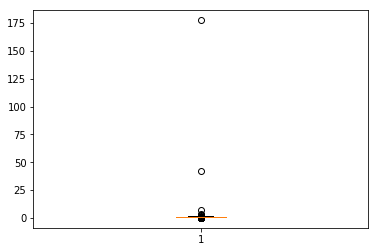

In [73]:
# The plot below shows that there are outliers that are skewing the data sets. These outliers need to be removed.
plt.boxplot(df_master['actual_rating']);

In [74]:
# Normally, outliers are 1.5 times greater than the IQR (Inter Quartile Range). The acceptable upper and lower limits for 
# actual_ratings can be found below

upper_quartile = np.percentile(df_master['actual_rating'], 75)
lower_quartile = np.percentile(df_master['actual_rating'], 25)
outlier_constant = 1.5

IQR = upper_quartile - lower_quartile
acceptable_IQR = IQR * outlier_constant

upper_limit = upper_quartile + acceptable_IQR
lower_limit = lower_quartile - acceptable_IQR

# Show the limits
lower_limit, upper_limit 

(0.7000000000000001, 1.5)

In [75]:
#Remove outliers from df_master
df_master = df_master[(df_master['actual_rating'] >= lower_limit) & (df_master['actual_rating'] <= upper_limit)]

##### Test

In [76]:
#Check that the outliers have been removed and that the 'actual_rating' is within acceptable limit.
df_master['actual_rating'].describe()

count    1942.000000
mean        1.108248
std         0.142902
min         0.800000
25%         1.000000
50%         1.100000
75%         1.200000
max         1.400000
Name: actual_rating, dtype: float64

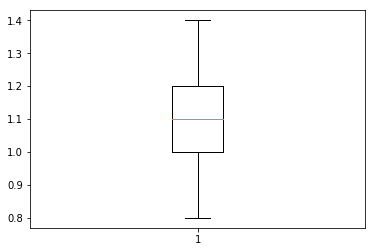

In [77]:
# The plot below shows that outliers that are skewing the data set have been removed.
plt.boxplot(df_master['actual_rating']);

## Analysis
Here, we will aim to provide 3 insights and at least 1 visualisation.

### Insight 1: Ratings are lenient
After removing outliers, approximately 75% of ratings are greater than 1.0 (ie 100/100). More than 50% are >= 1.1 and more than 25% of the ratings are >= 1.2. This shows that the ratings are lenient. 

After all, who could possibly rate these awesome dogs any other way!

C:\Users\micha\AppData\Local\conda\conda\envs\Python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


''

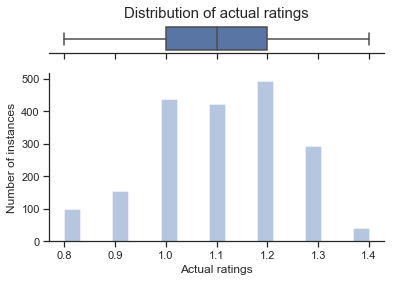

In [78]:
# Using seaborn plots to analyse the ratings distribtuions
sns.set(style="ticks")

x = df_master['actual_rating']

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x, ax=ax_box)
sns.distplot(x, ax=ax_hist, kde = False)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

ax_box.set_title('Distribution of actual ratings', fontsize = 15)
ax_box.set_xlabel('')
ax_hist.set_ylabel('Number of instances')
ax_hist.set_xlabel('Actual ratings')
;

### Insight 2: Ratings are correlated with retweet and favorite counts 
After removing outliers, there is a positive correlation between the ratings of a given post and the average number of retweets and favorites. the higher the ratings of a post, the higher the average number of retweets and favorites.

In [79]:
# Create a data frame to analyse the relationship between ratings of a post and the associated average retweets and favorites

subdf_mean_rating_retweet_fave = df_master[['actual_rating', 'retweet_count', 'favorite_count']].groupby(['actual_rating']).mean().reset_index()
subdf_mean_rating_retweet_fave

,actual_rating,retweet_count,favorite_count
0,0.800000,921.970149,2530.462687
1,0.818182,NaN,NaN
2,0.900000,726.787879,2190.343434
3,1.000000,1550.734177,4180.401899
4,1.100000,2122.776119,6528.082090
5,1.200000,3099.886076,10880.943038
6,1.300000,5830.972222,20000.966667
7,1.400000,9892.523810,29096.809524


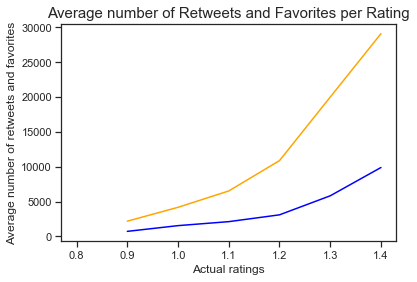

In [80]:
# Plot to visually see the relationship between post ratings, and the average number of retweets and favorites.

plt.plot(subdf_mean_rating_retweet_fave['actual_rating'], subdf_mean_rating_retweet_fave['retweet_count'], color = 'blue')
plt.plot(subdf_mean_rating_retweet_fave['actual_rating'], subdf_mean_rating_retweet_fave['favorite_count'], color = 'orange')
plt.xlabel('Actual ratings')
plt.ylabel('Average number of retweets and favorites')
plt.title('Average number of Retweets and Favorites per Rating', fontsize = 15)
plt.show()

### Insight 3: Number of tweets do not determine the popularity of a certain dog type
After removing outliers and only looking at tweets with a dog type, we observe a few interesting things. 

Pupper has the highest number of tweets. However, it has the lowest average rating, retweet count and favorite count per post. Puppo and Doggo have the highest average rating, retweet count and favorite count per post despite having low number of tweets.

In [81]:
# Create a data frame to analyse the relationship between dog type with tweet count, retweet and favorite count
# and average post ratings

# DF1 - Create a data frame summarising average rating, retweet and favorite per post by dog type
subdf_mean_measures_dogtype = df_master[['dog_type', 'actual_rating', 'retweet_count', 'favorite_count']].groupby(['dog_type']).mean().reset_index()

# DF2 - Create a data frame summarising tweet count by dog type
subdf_count_measures_dogtype = df_master[['dog_type']].groupby(['dog_type']).size().reset_index(name = 'count')

# Combine DF1 and DF2
combined_subdf = pd.merge(subdf_mean_measures_dogtype, subdf_count_measures_dogtype, how = 'left', left_on = 'dog_type', right_on = 'dog_type')
combined_subdf = combined_subdf.sort_values(by = 'count', ascending = False)
combined_subdf

,dog_type,actual_rating,retweet_count,favorite_count,count
2,pupper,1.099543,2274.311688,6793.396104,219
0,doggo,1.184722,4577.166667,13555.880952,72
3,puppo,1.204167,5485.176471,17170.647059,24
1,floofer,1.180000,2436.800000,7940.600000,10


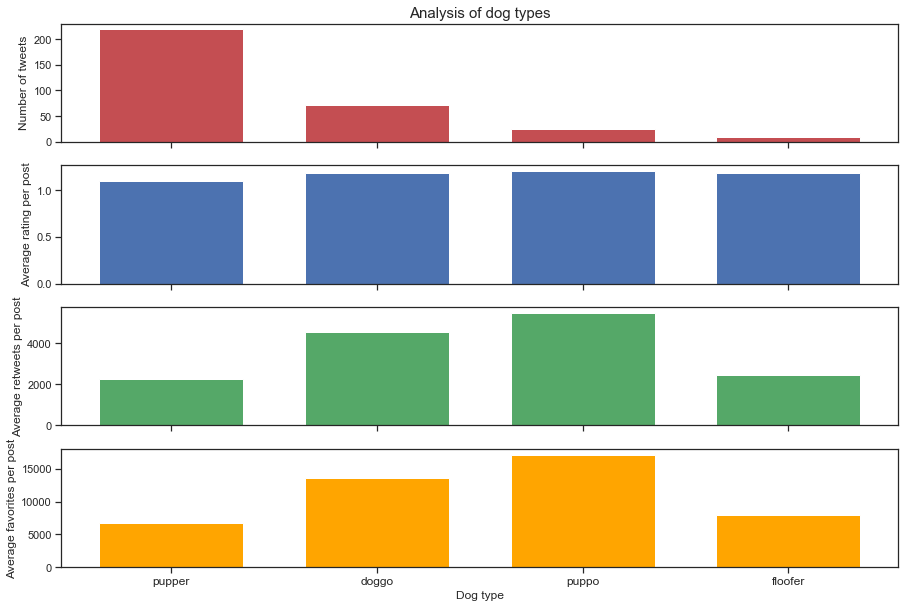

In [82]:
#Plot the combined data frame visually to see interrelations between measures by dog type

plt.figure(figsize=(15,10))

x = combined_subdf['dog_type']

n = combined_subdf['count']
y = combined_subdf['actual_rating']
z = combined_subdf['retweet_count']
k = combined_subdf['favorite_count']

width = 0.7

ax0 = plt.subplot(411)
ax0.set_title('Analysis of dog types', fontsize = 15)
ax0.set_ylabel('Number of tweets')
plt.bar(x, n, width=width,color='r',align='center')
# make these tick labels invisible
plt.setp(ax0.get_xticklabels(), visible = False, fontsize= 12)

ax1 = plt.subplot(412, sharex = ax0)
ax1.set_ylabel('Average rating per post')
plt.bar(x, y, width=width,color='b',align='center')
# make these tick labels invisible
plt.setp(ax1.get_xticklabels(), visible = False, fontsize= 12)

ax2 = plt.subplot(413, sharex = ax0)
ax2.set_ylabel('Average retweets per post')
plt.bar(x, z, width=width,color='g',align='center')
# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible = False, fontsize= 12)

ax3 = plt.subplot(414, sharex = ax0)
ax3.set_ylabel('Average favorites per post')
ax3.set_xlabel('Dog type')
plt.bar(x, k, width=width,color='orange',align='center')
# make these tick labels visible
plt.setp(ax3.get_xticklabels(), visible = True, fontsize= 12)


plt.show()

### Store
Store data in csv for future analysis.

In [83]:
# Save clean DataFrame to csv file
df_master.to_csv('twitter_archive_master.csv')